In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os

In [2]:
os.path.expanduser('~/Users/phinchosherpa/Desktop/nyu/BirdVox-300h_csv-annotations/unit08_2015-09-19_dawn.csv')
csv_path='/Users/phinchosherpa/Desktop/nyu/BirdVox-300h_csv-annotations/unit08_2015-09-19_dawn.csv'

In [4]:
#Here's what i propose. This folder contains 150 CSV files, which have multiple columns,
#for frequency and for multiple levels of animal taxonomy: coarse, medium, and fine. 
#What i would like you to do would be to parse those CSV files and make a histogram of
#frequency centers per species. So that you could verify that sparrows are in the high frequencies,
#thrushes in the medium frequencies, and herons in the low frequencies, etc. Start by using the
#coarser level of taxonomy (e.g. "passerine"), then move on to the medium level (e.g. "sparrow", "thrush"),
#and lastly see if you can do the same with species.

In [3]:
df=pd.read_csv(csv_path)
df.head()

,Time (s),Frequency (Hz),Taxonomy Code,Fine Label,Medium Label,Coarse Label
0,1477.866114,7416.5,X.X.X,NaN,NaN,UNKN
1,1478.200638,7283.5,X.X.X,NaN,NaN,UNKN
2,2499.677426,7443.0,1.X.X,NaN,NaN,passerine
3,3091.185527,3057.0,0.2.3,NaN,NaN,PEEP
4,3091.649387,2897.5,0.2.3,NaN,NaN,PEEP


In [6]:
#json is a id a file path that I downloaded to to know the taxonomy code of the birds.

In [4]:
import json

json_path = "../taxonomy.json"
with open(json_path, "r") as json_file:
    json_dicts= json.load(json_file)
json_dict = {
    json_dict["common_name"]: json_dict["id"]
    for json_dict in json_dicts["taxonomy"]}

rev_json_dict = {json_dict[k]: k for k in json_dict.keys()}
len(rev_json_dict)

22

In [ ]:
#rev reverses the keys which is in a dictoniary

In [5]:
rev_json_dict = {json_dict[k]: k for k in json_dict.keys()}
len(rev_json_dict)

22

Text(0.5, 1.0, 'Fine Level')

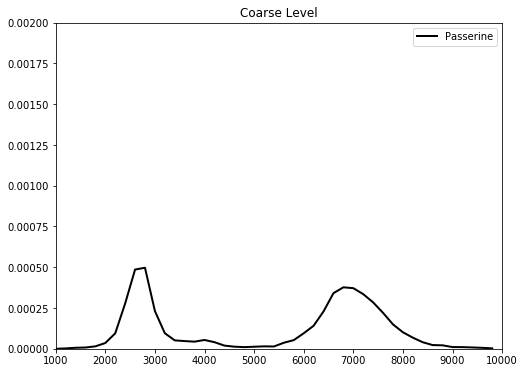

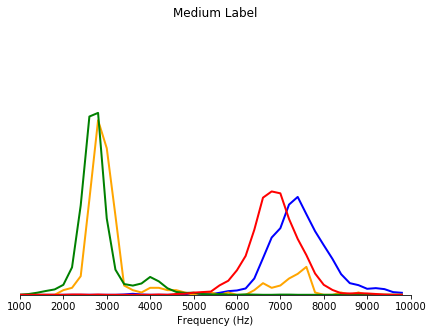

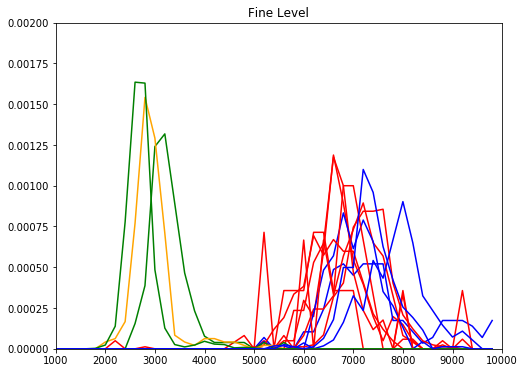

In [13]:
color_dict = {
    "American sparrow": "blue",
    "Cardinal": "orange",
    "Thrush": "green",
    "Warbler": "red"
}

# Coarse level
plt.figure(figsize=(8, 6))
plt.plot(histogram_bins[:-1], density_dict["Passerine"], label="Passerine", linewidth=2.0, color='black')
plt.xlim(1000, 10000)
plt.ylim(0, 0.002)
plt.title("Coarse Level")
plt.legend()

# Medium level
#plt.figure(figsize=(15, 3))
plt.figure(figsize=(7, 5))
medium_keys = [key for key in density_dict.keys() if len(json_dict[key])==3]
for key in medium_keys:
    plt.plot(histogram_bins[:-1], density_dict[key],
             label=key, linewidth=2.0, color=color_dict[key])
plt.xlim(1000, 10000)
plt.ylim(0, 0.002)
plt.title("Medium Label")
plt.xlabel("Frequency (Hz)")
plt.yticks([])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
#plt.legend()
plt.savefig("meduim_call_annotations.png", bbox_inches="tight", dpi=2000)

# Fine level
plt.figure(figsize=(8, 6))
fine_keys = [key for key in density_dict.keys() if len(json_dict[key])==5]
for key in fine_keys:
    medium_key = rev_json_dict[json_dict[key][:3]]
    plt.plot(histogram_bins[:-1], density_dict[key],
             label=key, linewidth=1.5, color=color_dict[medium_key])
plt.xlim(1000, 10000)
plt.ylim(0, 0.002)
plt.title("Fine Level")

In [6]:
{rev_json_dict[k]: rev_json_dict[k[:3]] for k in list(rev_json_dict.keys()) if len(k)==5}

{'American redstart': 'Warbler',
 'American tree sparrow': 'American sparrow',
 'Bay-breasted warbler': 'Warbler',
 'Black-throated blue warbler': 'Warbler',
 'Canada warbler': 'Warbler',
 'Chipping sparrow': 'American sparrow',
 'Common yellowthroat': 'Warbler',
 'Gray-cheeked thrush': 'Thrush',
 'Green heron': 'Heron',
 'Mourning warbler': 'Warbler',
 'Ovenbird': 'Warbler',
 'Rose-breasted grosbeak': 'Cardinal',
 'Savannah sparrow': 'American sparrow',
 "Swainson's thrush": 'Thrush',
 'White-throated sparrow': 'American sparrow'}

In [7]:
json_dict

{'Passerine': '1',
 'Pelecaniforme': '2',
 'American sparrow': '1.1',
 'Cardinal': '1.2',
 'Thrush': '1.3',
 'Warbler': '1.4',
 'Heron': '2.1',
 'American redstart': '1.4.1',
 'American tree sparrow': '1.1.1',
 'Bay-breasted warbler': '1.4.2',
 'Black-throated blue warbler': '1.4.3',
 'Canada warbler': '1.4.4',
 'Chipping sparrow': '1.1.2',
 'Common yellowthroat': '1.4.5',
 'Gray-cheeked thrush': '1.3.1',
 'Green heron': '2.1.1',
 'Mourning warbler': '1.4.6',
 'Ovenbird': '1.4.7',
 'Rose-breasted grosbeak': '1.2.1',
 'Savannah sparrow': '1.1.3',
 "Swainson's thrush": '1.3.2',
 'White-throated sparrow': '1.1.4'}

In [8]:
import glob
import tqdm

csv_glob = "/Users/phinchosherpa/Desktop/nyu/BirdVox-300h_csv-annotations/*.csv"
histogram_bins = np.arange(1000, 10200, 200)
density_dict = {}

for key in tqdm.tqdm(json_dict): 
    taxon_id = json_dict[key]
    frequency_list = []
    for csv_path in glob.glob(csv_glob):
        df = pd.read_csv(csv_path)
        filtered_df = df[df["Taxonomy Code"].str.startswith(taxon_id)]
        frequency_list = frequency_list + list(filtered_df["Frequency (Hz)"])
    
    if frequency_list == []:
        continue
    
    density, _ = np.histogram(frequency_list, density=True, bins=histogram_bins)
    density_dict[key] = density

100%|██████████| 22/22 [00:10<00:00,  2.26it/s]


In [13]:
from collections import Counter

counter = Counter()

Counter(["a", "b", "a"])

Counter({'a': 2, 'b': 1})

(1000, 10000)

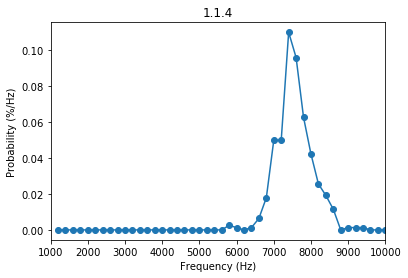

In [9]:
histogram_bins = np.arange(1000, 10200, 200)
densities, _ = np.histogram(frequency_list, density=True, bins=histogram_bins)
plt.plot(histogram_bins[1:], densities*100, '-o')
plt.title(taxon_id)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Probability (%/Hz)")
plt.xlim(min(histogram_bins), max(histogram_bins))

In [17]:
import os
import datetime
# List all CSV files by name
csv_dir = "/Users/phinchosherpa/Desktop/nyu/BirdVox-300h_csv-annotations/"
csv_names = os.listdir(csv_dir)

# Filter to those which contain the word "dawn"
filtered_csv_names = []
for csv_name in csv_names:
    if "dawn" in csv_name:
        filtered_csv_names.append(csv_name)
        
# Get the date
start_date = datetime.datetime(
    year=2015, month=8, day=1)

count_per_day = np.zeros((120,))

for csv_name in filtered_csv_names:
    date_str = csv_name.split("_")[1]
    date_split = date_str.split("-")
    year = int(date_split[0])
    month = int(date_split[1])
    day = int(date_split[2])
    current_date = datetime.datetime(
        year=year, month=month, day=day)
    date_delta = current_date - start_date
    csv_path = os.path.join(csv_dir, csv_name)
    df = pd.read_csv(csv_path)
    row_count = len(df)
    count_per_day[date_delta.days] = row_count 

Text(0, 0.5, 'Number of flight calls at dawn')

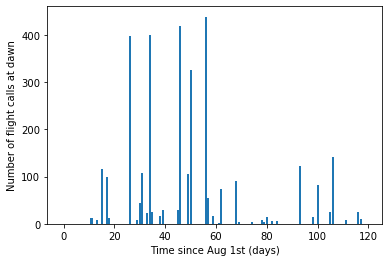

In [18]:
plt.bar(range(120), count_per_day)
plt.xlabel("Time since Aug 1st (days)")
plt.ylabel("Number of flight calls at dawn")

In [19]:
df[df["Taxonomy Code"].str.startswith("1.1")]

,Time (s),Frequency (Hz),Taxonomy Code,Fine Label,Medium Label,Coarse Label
370,7147.201817,8095.238,1.1.X,NaN,sparrow,passerine


In [20]:
import pandas as pd
sparrow="1.1"
warbler="1.4"
thrushes="1.3"
cardinals="1.2"

taxon_dict = {
    "sparrow": "1.1", "warbler": "1.4",
    "thrush": "1.3", "cardinal": "1.2"}

month_strs = [str(m).zfill(2) for m in range(8, 12)]
counter_list = []

# List all CSV files by name
csv_dir = "/Users/phinchosherpa/Desktop/nyu/BirdVox-300h_csv-annotations/"
csv_names = os.listdir(csv_dir)

for month_str in month_strs:
    
    taxon_counter = Counter()

    # Filter to those which contain the word "dawn"
    filtered_csv_names = []
    for csv_name in csv_names:
        if "dawn" in csv_name:
            date_str = csv_name.split("_")[1]
            date_split = date_str.split("-")
            if str(date_split[1]) == month_str:
                filtered_csv_names.append(csv_name)


    for csv_name in filtered_csv_names:
        csv_path = os.path.join(csv_dir, csv_name)
        df = pd.read_csv(csv_path)
        for taxon in taxon_dict:
            taxon_series = df["Taxonomy Code"].str.startswith(taxon_dict[taxon])
            taxon_counter[taxon] += sum(taxon_series)
            
    counter_list.append(taxon_counter)
    
    print("Month = {}".format(month_str))
    print(taxon_counter)
    print("")
    print(taxon_counter["thrush"])
 

Month = 08
Counter({'thrush': 381, 'warbler': 88, 'sparrow': 15, 'cardinal': 9})

381
Month = 09
Counter({'thrush': 843, 'warbler': 482, 'sparrow': 28, 'cardinal': 19})

843
Month = 10
Counter({'thrush': 74, 'sparrow': 71, 'cardinal': 22, 'warbler': 4})

74
Month = 11
Counter({'sparrow': 136, 'thrush': 112, 'cardinal': 14, 'warbler': 3})

112


Text(0, 0.5, 'Number of flight calls per month')

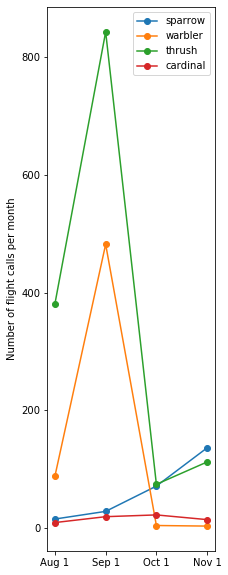

In [21]:
plt.figure(figsize=(3, 10))
for taxon in taxon_dict:
    plt.plot(month_strs,[x[taxon] for x in counter_list], '-o', label=taxon)
plt.gca().set_xticklabels(["Aug 1", "Sep 1", "Oct 1", "Nov 1"])
plt.legend()
plt.ylabel("Number of flight calls per month")

Text(0.5, 1.0, 'Medium level')

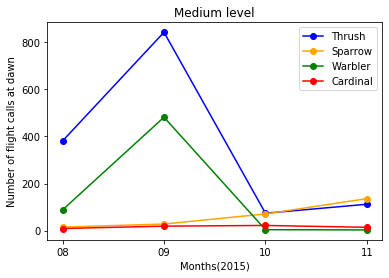

In [22]:
plt.plot(month_strs,[x["thrush"] for x in counter_list], '-o',c='blue',label='Thrush')
plt.plot(month_strs,[x["sparrow"] for x in counter_list], '-o',c='orange',label='Sparrow')
plt.plot(month_strs,[x["warbler"] for x in counter_list], '-o',c='green',label='Warbler')
plt.plot(month_strs,[x["cardinal"] for x in counter_list], '-o',c='red',label="Cardinal")
plt.legend()
plt.xlabel("Months(2015)")
plt.ylabel("Number of flight calls at dawn")
plt.title("Medium level")


In [23]:
[counter_list[0]["thrush"], counter_list[1]["thrush"], counter_list[2]["thrush"], counter_list[3]["thrush"]]

[381, 843, 74, 112]

In [24]:
y = []
for x in [0, 1, 2, 3]:
    y.append(counter_list[x]["thrush"])

In [25]:
# list comprehension
[counter_list[x]["thrush"] for x in [0, 1, 2, 3]]

[381, 843, 74, 112]

In [26]:
curve_dict = {}
for taxon in taxon_dict:
    curve_dict[taxon] = [x[taxon] for x in counter_list]
    
def maximize_value(dictionary):
    # written with the help of Brian :)
    return max((v, k) for (k, v) in dictionary.items())[1]

100%|██████████| 22/22 [00:09<00:00,  2.56it/s]


In [168]:
def function_name(input_number):
    output_number = 2 * input_number + 1
    return output_number

In [201]:
def format_time(x):
    return "{} minutes, {} seconds".format(x // 60, x % 60)


In [194]:
def eucdiv(p, q):
    quotient = (p//q)
    remainder = (p%q)
    p_bis = q * quotient + remainder
    return p_bis

In [213]:
format_time(59)

'0 minutes, 59 seconds'